In [7]:
class my_linear_regression:
    def __init__(self):
        self.m=None   ## slope
        self.b=None   ## intercept
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num+((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
            den=den+(x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())
        self.m=num/den
        self.b=y_train.mean()-(self.m*x_train.mean())
        print(self.m)
        print(self.b)
    def predict(self,x_test):
        return self.m*x_test+self.b

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [9]:
data=pd.read_excel('data.xlsx')

In [10]:
data.head(-5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
190,6.19,2.69
191,7.28,3.48
192,8.25,3.75
193,4.57,1.94


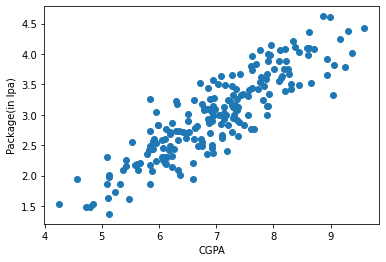

In [11]:
plt.scatter(data['cgpa'],data['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [12]:
x=data.iloc[:,0].values
x_sk=data.iloc[:,0:1]

In [13]:
y=data.iloc[:,1].values
y_sk=data.iloc[:,-1]

In [14]:
x

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [15]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train_sk,x_test_sk,y_train_sk,y_test_sk=train_test_split(x_sk,y_sk,test_size=0.2,random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression

In [44]:
## Sklearn linear regression object
sklearn_lr=LinearRegression()
sklearn_lr.fit(x_train_sk,y_train_sk)

LinearRegression()

In [20]:
sklearn_lr.predict(x_test_sk.iloc[0].values.reshape(1,1))

C:\Users\91776\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [22]:
lr=my_linear_regression()

In [23]:
lr.fit(x_train,y_train)

0.5579519734250721
-0.8961119222429152


In [24]:
lr.predict(x_test[0])

3.891116009744203

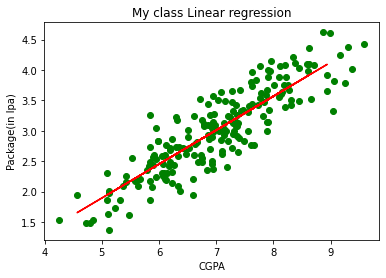

In [25]:

plt.scatter(data['cgpa'],data['package'],color='green')
plt.plot(x_test,lr.predict(x_test),color='red')
plt.title('My class Linear regression')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

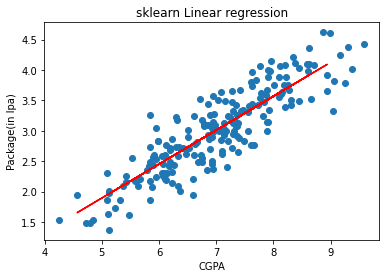

In [26]:

plt.scatter(data['cgpa'],data['package'])
plt.plot(x_test_sk,sklearn_lr.predict(x_test_sk),color='red')
plt.title('sklearn Linear regression')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [27]:
r2_score(y_test,lr.predict(x_test))

0.7807301475103842

# MSE(Mean Squared Error)

In [33]:
y_pred=lr.predict(x_test)
summ=0
n=len(y_test)
for i in range(n):
    diff=y_test[i]-y_pred[i]
    sq_diff=diff**2
    summ=summ+sq_diff
MSE=summ/n
print("The Mean Square Error is: ",MSE)

The Mean Square Error is:  0.1212923531349552


In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(y_test,y_pred)

0.12129235313495523

# MAE(Mean Absolute Error)

In [39]:
summ=0
for i in range(n):
    summ = summ+abs(y_test[i] - y_pred[i])
MAE = summ/n
print("The Mean Absolute Error is: ",MAE)

The Mean Absolute Error is:  0.28847109318781733


In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
mean_absolute_error(y_test,y_pred)

0.2884710931878174

# RMSE(Root mean square error)

In [42]:
from math import sqrt

In [43]:
sqrt(MSE)

0.34827051717731605